# Steel Industry  Consumption Energy in DAEWOOSteelCo. Ltd in Gwangyang, SouthKorea

## By: Fatma Awad

In [1]:
#Required liberaries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

#Splitting Data:
from sklearn.model_selection import train_test_split

#Data Preprocessing:
from sklearn.preprocessing import MinMaxScaler

#Models:
from sklearn.linear_model import LinearRegression, Lasso, RidgeCV, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
import joblib

#Model Evaluation:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

warnings.filterwarnings("ignore")
sns.set(rc={'figure.figsize':(10,10)}, font_scale=1.2)

## Reading Data:

In [2]:
df = pd.read_csv("Steel_industry_data.csv")
df.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


## Data Information & Description:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  35040 non-null  object 
 1   Usage_kWh                             35040 non-null  float64
 2   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64
 3   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 4   CO2(tCO2)                             35040 non-null  float64
 5   Lagging_Current_Power_Factor          35040 non-null  float64
 6   Leading_Current_Power_Factor          35040 non-null  float64
 7   NSM                                   35040 non-null  int64  
 8   WeekStatus                            35040 non-null  object 
 9   Day_of_week                           35040 non-null  object 
 10  Load_Type                             35040 non-null  object 
dtypes: float64(6), 

In [4]:
df.describe()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
count,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000
mean,27.386892,13.035384,3.870949,0.011524,80.578056,84.367870,42750.000000
std,33.444380,16.306000,7.424463,0.016151,18.921322,30.456535,24940.534317
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.200000,2.300000,0.000000,0.000000,63.320000,99.700000,21375.000000
50%,4.570000,5.000000,0.000000,0.000000,87.960000,100.000000,42750.000000
75%,51.237500,22.640000,2.090000,0.020000,99.022500,100.000000,64125.000000
max,157.180000,96.910000,27.760000,0.070000,100.000000,100.000000,85500.000000


## Check for duplicates:

In [5]:
df.duplicated().sum()

0

## Data Exploration:

In [6]:
df['WeekStatus'].unique()

array(['Weekday', 'Weekend'], dtype=object)

In [7]:
df['Day_of_week'].unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

In [8]:
df['Load_Type'].unique()

array(['Light_Load', 'Medium_Load', 'Maximum_Load'], dtype=object)

## Data Analysis(Visualization):

## 1.Univariate:

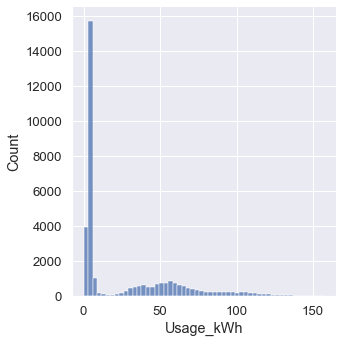

In [9]:
sns.displot(data=df, x='Usage_kWh')

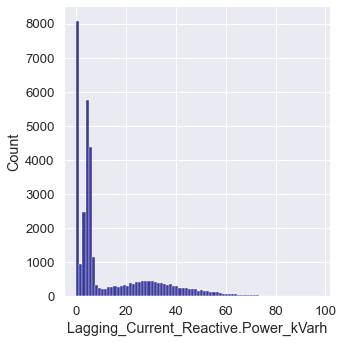

In [10]:
sns.displot(data=df, x='Lagging_Current_Reactive.Power_kVarh', color='navy')

<AxesSubplot:xlabel='Leading_Current_Reactive_Power_kVarh', ylabel='Density'>

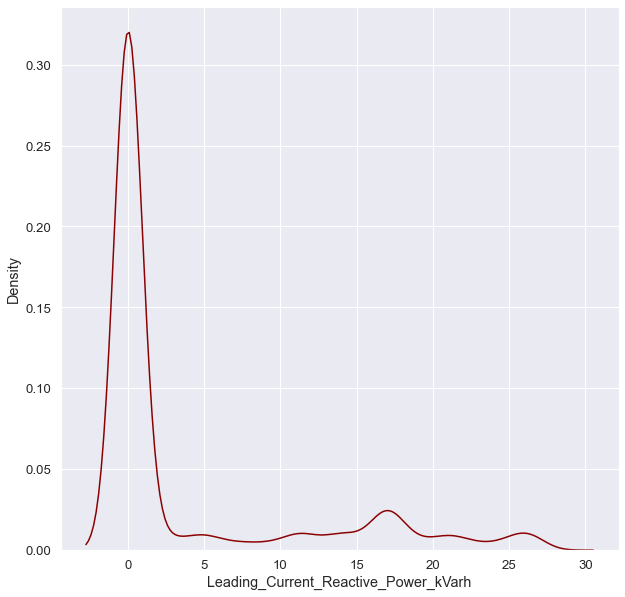

In [11]:
sns.kdeplot(data=df, x='Leading_Current_Reactive_Power_kVarh', color='darkred')

<AxesSubplot:xlabel='CO2(tCO2)', ylabel='Count'>

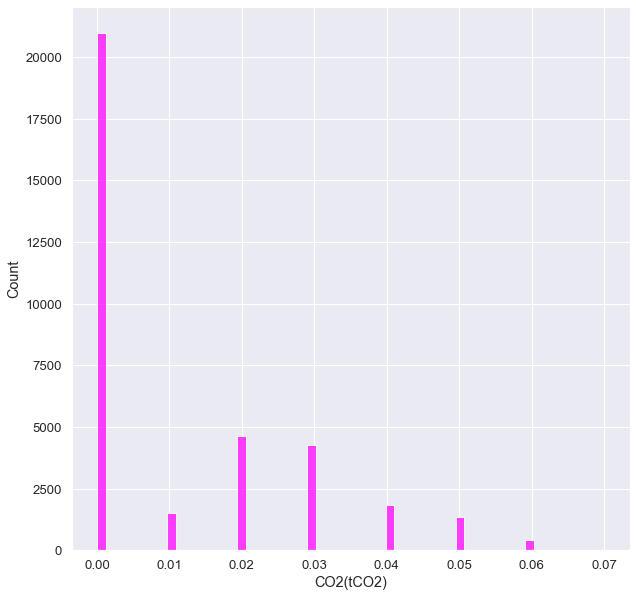

In [12]:
sns.histplot(data=df, x='CO2(tCO2)',color='magenta')

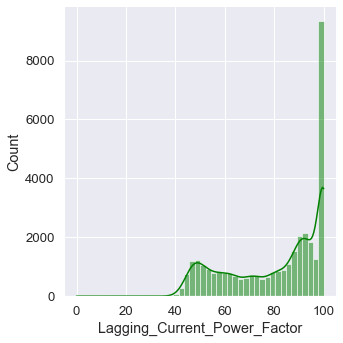

In [13]:
sns.displot(data=df, x='Lagging_Current_Power_Factor',kde=True, color='green')

<AxesSubplot:xlabel='Leading_Current_Power_Factor', ylabel='Density'>

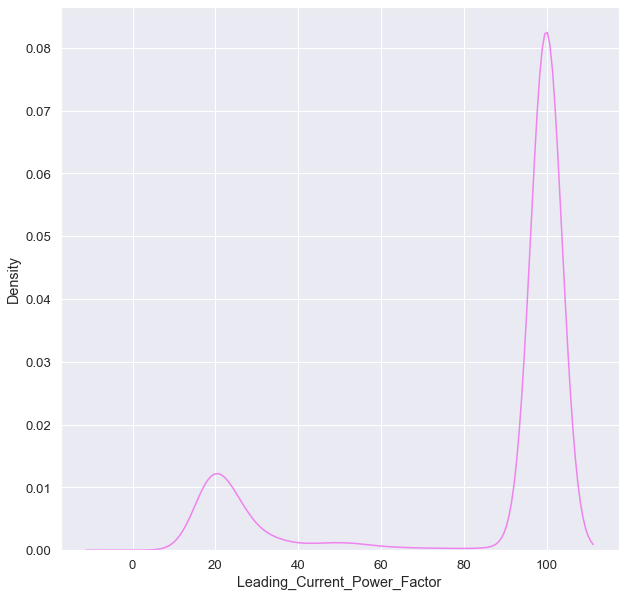

In [14]:
sns.kdeplot(data=df, x='Leading_Current_Power_Factor',color='violet')

<AxesSubplot:ylabel='NSM'>

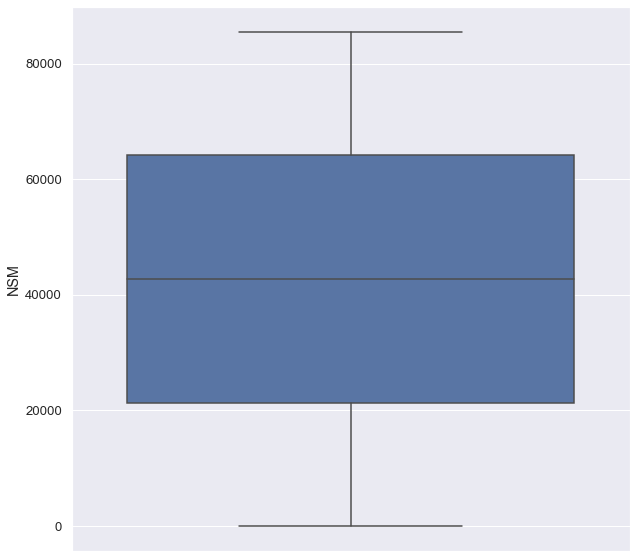

In [15]:
sns.boxplot(data=df, y='NSM')

<AxesSubplot:xlabel='WeekStatus', ylabel='count'>

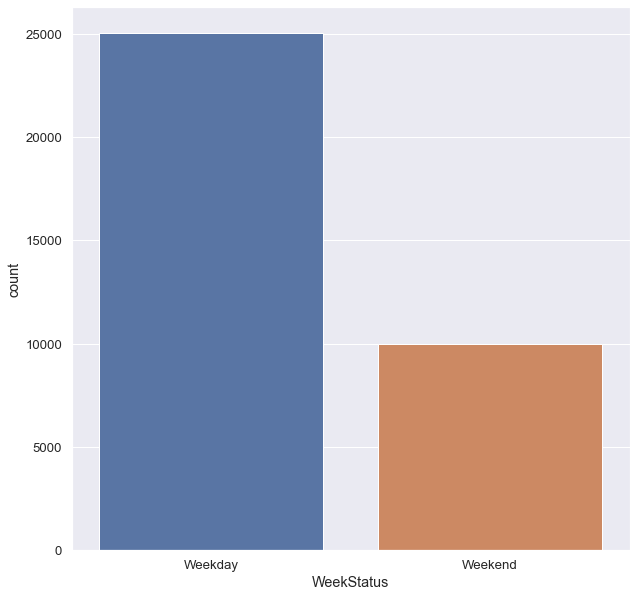

In [16]:
sns.countplot(data=df, x='WeekStatus')

<AxesSubplot:xlabel='Load_Type', ylabel='count'>

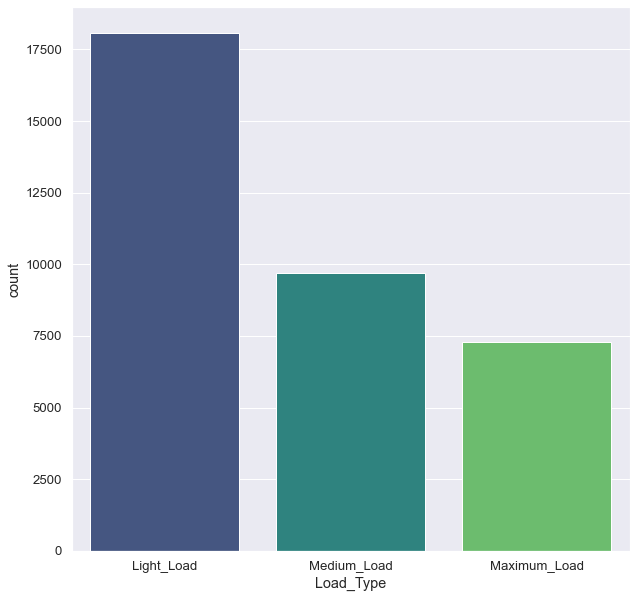

In [17]:
sns.countplot(data=df, x='Load_Type', palette='viridis')

## 2.Bivariate Analysis:

<AxesSubplot:xlabel='Lagging_Current_Reactive.Power_kVarh', ylabel='Usage_kWh'>

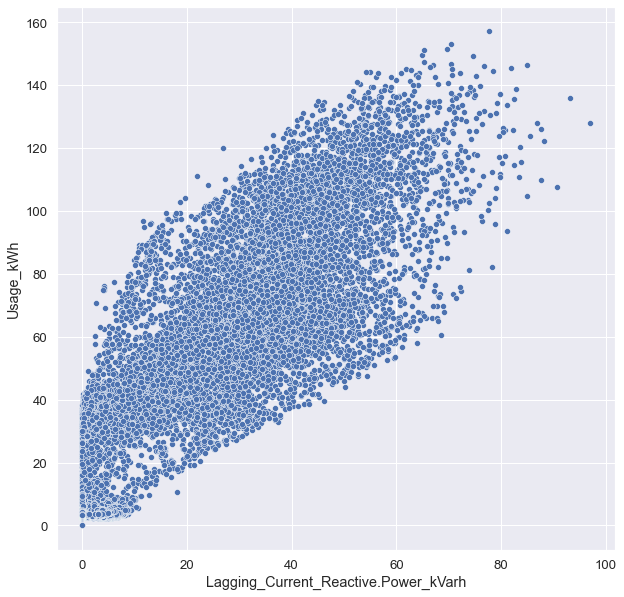

In [18]:
sns.scatterplot(data=df, x='Lagging_Current_Reactive.Power_kVarh', y='Usage_kWh')
# stron correlations

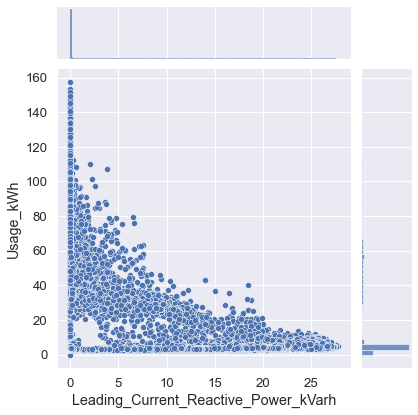

In [19]:
sns.jointplot(data=df, x='Leading_Current_Reactive_Power_kVarh', y='Usage_kWh',kind='scatter')

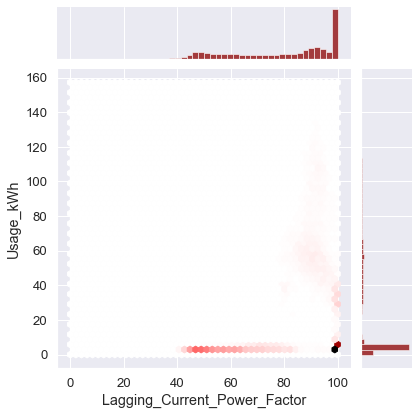

In [20]:
sns.jointplot(data=df, x='Lagging_Current_Power_Factor', y='Usage_kWh', kind='hex', color='darkred')
# week relation

<AxesSubplot:xlabel='CO2(tCO2)', ylabel='Usage_kWh'>

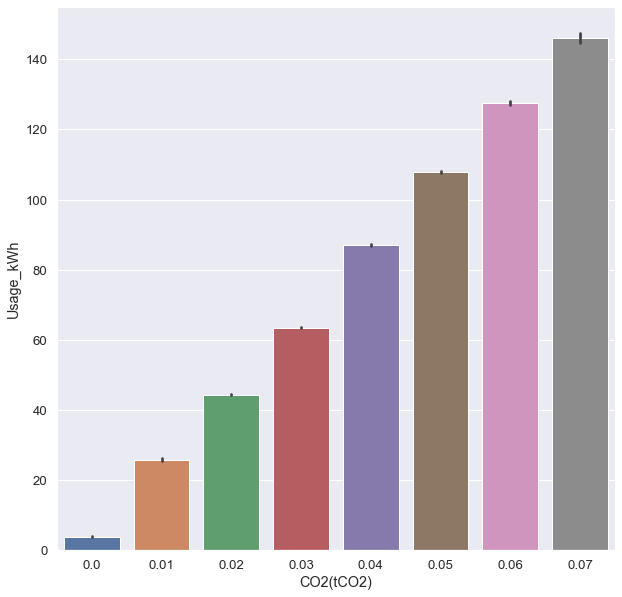

In [21]:
sns.barplot(data=df, x='CO2(tCO2)', y='Usage_kWh')
# the more release of CO2 the more energy consumption

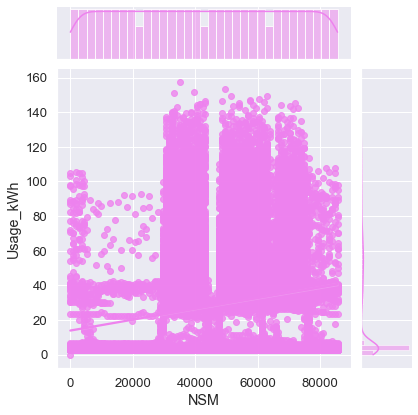

In [22]:
sns.jointplot(data=df, x='NSM', y='Usage_kWh',kind='reg',color='violet')
# week correlation

<AxesSubplot:xlabel='WeekStatus', ylabel='Usage_kWh'>

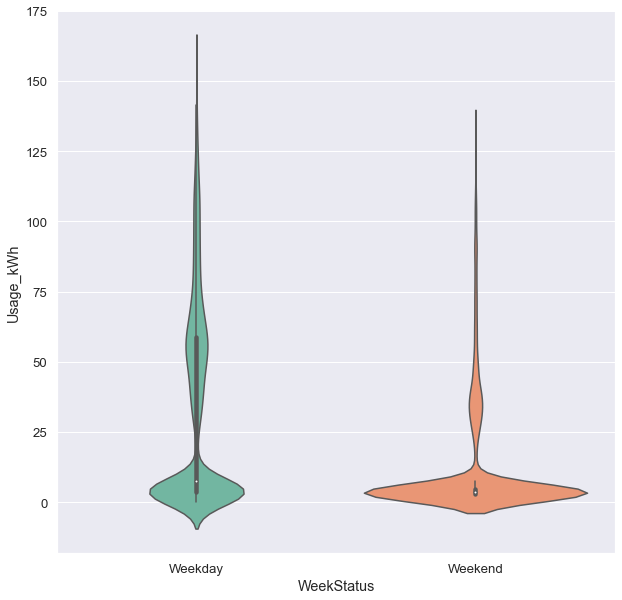

In [23]:
sns.violinplot(data=df, x='WeekStatus', y='Usage_kWh', palette='Set2')
# weekday consumes more energy

<AxesSubplot:xlabel='Load_Type', ylabel='Usage_kWh'>

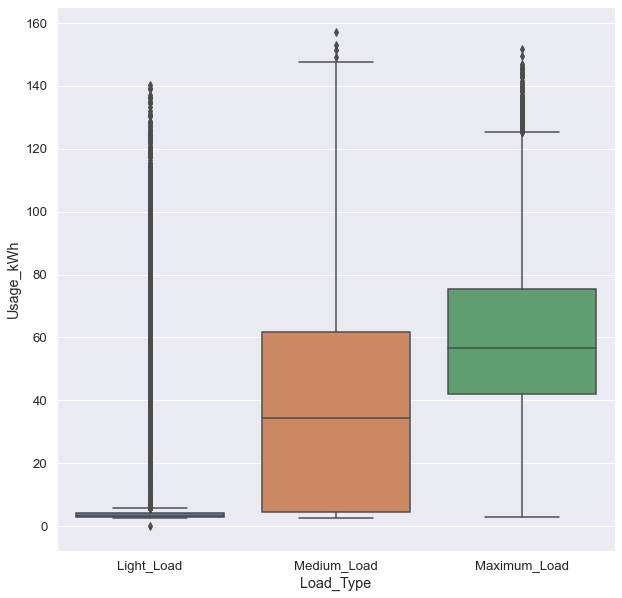

In [24]:
sns.boxplot(data=df, x='Load_Type', y='Usage_kWh')
# Maximum load is more in energy usege

<AxesSubplot:xlabel='WeekStatus', ylabel='CO2(tCO2)'>

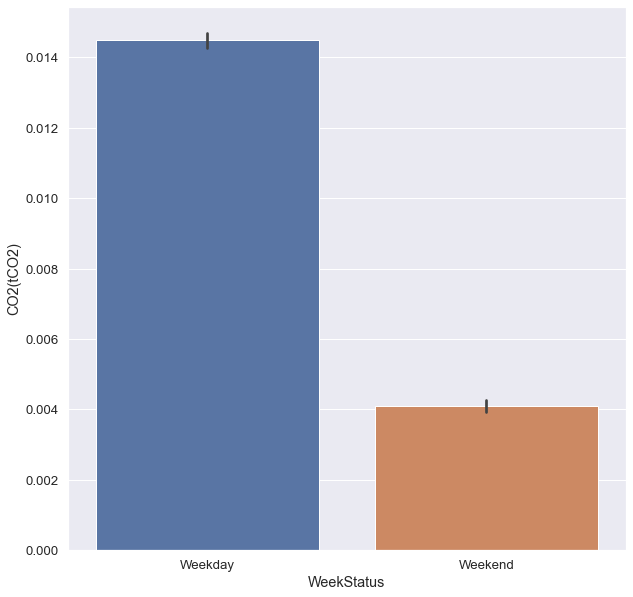

In [25]:
sns.barplot(data=df, x='WeekStatus', y='CO2(tCO2)')
# weekday is more in release of CO2

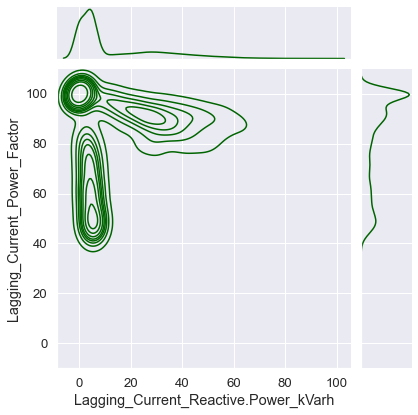

In [26]:
# relation between Lagging_Current_Reactive.Power_kVarh & Lagging_Current_Power_Factor
sns.jointplot(data=df, x='Lagging_Current_Reactive.Power_kVarh', y='Lagging_Current_Power_Factor',kind='kde',color='darkgreen')
# week relation

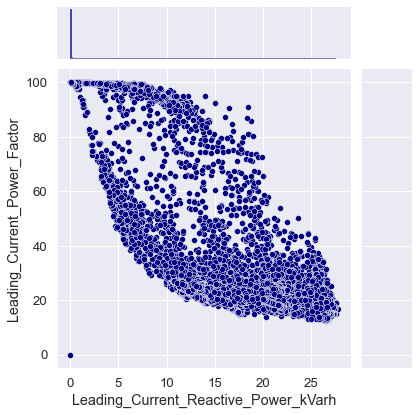

In [27]:
# Realtion between Leading_Current_Reactive_Power_kVarh & Leading_Current_Power_Factor:
sns.jointplot(data=df, x='Leading_Current_Reactive_Power_kVarh', y='Leading_Current_Power_Factor',kind='scatter',color='navy')
# there is inversly strong relation

<AxesSubplot:xlabel='Load_Type', ylabel='CO2(tCO2)'>

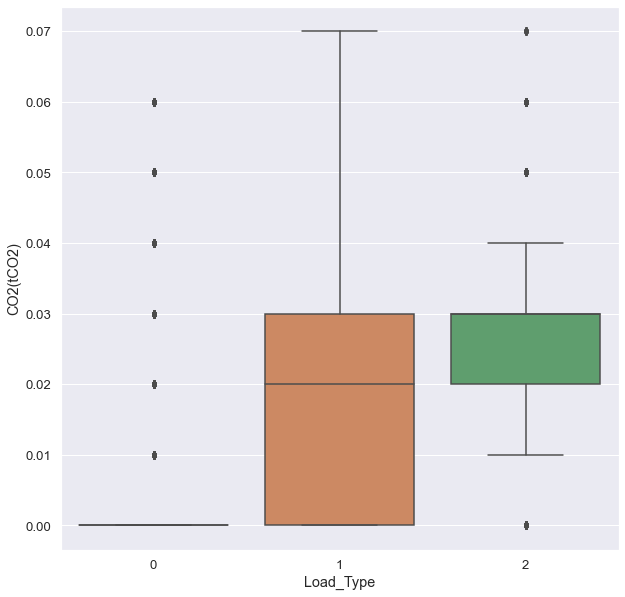

In [54]:
sns.boxplot(data=df, x='Load_Type', y='CO2(tCO2)')

## Data correlations:

In [29]:
df.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


<AxesSubplot:>

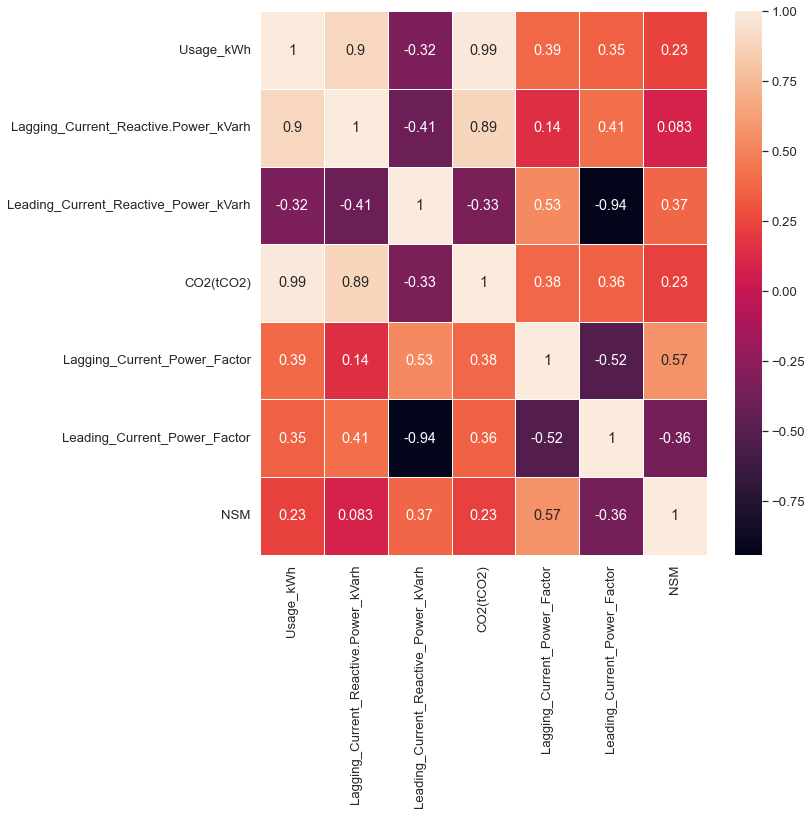

In [30]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, linewidth=1)

In [1]:
# 1.there strong correlation between Usage(kwh) & Lagging_Current_Reactive.Power_kVarh & co2(tco2) & Load_Type & week_status
# 2.there is strong correlation between Lagging_Current_Reactive.Power_kVarh & co2(tco2)
# 3.there is strong inverse relation between Leading_Current_Reactive_Power_kVarh & Leading_Current_Power_Factor
# 4.there is inverse relation between Lagging_Current_Power_Factor & Leading_Current_Power_Factor
# 5.there is medium ralation between Lagging_Current_Power_Factor & NSM

## Convert Categorical to numericals:

In [32]:
week = {"Weekday":0, 'Weekend':1}
Type = {"Light_Load":0, 'Medium_Load':1, 'Maximum_Load':2}

In [33]:
df['WeekStatus'] = df['WeekStatus'].map(week)
df['Load_Type'] = df['Load_Type'].map(Type)

In [34]:
df.isnull().sum()

date                                    0
Usage_kWh                               0
Lagging_Current_Reactive.Power_kVarh    0
Leading_Current_Reactive_Power_kVarh    0
CO2(tCO2)                               0
Lagging_Current_Power_Factor            0
Leading_Current_Power_Factor            0
NSM                                     0
WeekStatus                              0
Day_of_week                             0
Load_Type                               0
dtype: int64

## Feature Engineering:

In [35]:
#Extract year, month, day from date:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   date                                  35040 non-null  datetime64[ns]
 1   Usage_kWh                             35040 non-null  float64       
 2   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64       
 3   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64       
 4   CO2(tCO2)                             35040 non-null  float64       
 5   Lagging_Current_Power_Factor          35040 non-null  float64       
 6   Leading_Current_Power_Factor          35040 non-null  float64       
 7   NSM                                   35040 non-null  int64         
 8   WeekStatus                            35040 non-null  int64         
 9   Day_of_week                           35040 non-null  object        
 10

## Droping unnecessary columns:

In [37]:
df.drop(['date', 'Day_of_week'], axis=1, inplace=True)

## Data Splitting:

In [38]:
x = df.drop("Usage_kWh", axis=1)
y = df['Usage_kWh']

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.30, random_state=42)


## Data Preprocessing:

In [40]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

## Models:

In [41]:
#KNeighbousRegressor model:
model1 = KNeighborsRegressor()
model1.fit(x_train, y_train)
train_acc = model1.score(x_train, y_train)
test_acc = model1.score(x_test, y_test)
y_pred = model1.predict(x_test)
Accuracy = r2_score(y_pred, y_test)
Error = mean_absolute_error(y_pred, y_test)

print(f'train_accuracy: {train_acc}')
print(f'test_accuracy: {test_acc}')
print(f'Accuracy: {Accuracy}')
print(f'Error: {Error}')

train_accuracy: 0.9923286771735906
test_accuracy: 0.987844747166993
Accuracy: 0.9874834281480102
Error: 1.8890827625570776


In [42]:
#DecisionTreeRegressor model:
model2 = DecisionTreeRegressor()
model2.fit(x_train, y_train)
train_acc = model2.score(x_train, y_train)
test_acc = model2.score(x_test, y_test)
y_pred = model2.predict(x_test)
Accuracy = r2_score(y_pred, y_test)
Error = mean_absolute_error(y_pred, y_test)

print(f'train_accuracy: {train_acc}')
print(f'test_accuracy: {test_acc}')
print(f'Accuracy: {Accuracy}')
print(f'Error: {Error}')

train_accuracy: 1.0
test_accuracy: 0.997911923620802
Accuracy: 0.9979089562071559
Error: 0.5777111872146118


In [43]:
#RandomForestRegressor:
model3 = RandomForestRegressor()
model3.fit(x_train, y_train)
train_acc = model3.score(x_train, y_train)
test_acc = model3.score(x_test, y_test)
y_pred = model3.predict(x_test)
Accuracy = r2_score(y_pred, y_test)
Error = mean_absolute_error(y_pred, y_test)

print(f'train_accuracy: {train_acc}')
print(f'test_accuracy: {test_acc}')
print(f'Accuracy: {Accuracy}')
print(f'Error: {Error}')

train_accuracy: 0.9998493992116113
test_accuracy: 0.9990038787375883
Accuracy: 0.9990005610142884
Error: 0.3723435597412475


In [44]:
#GradientBoostingRegressor model:
model4 = GradientBoostingRegressor()
model4.fit(x_train, y_train)
train_acc = model4.score(x_train, y_train)
test_acc = model4.score(x_test, y_test)
y_pred = model4.predict(x_test)
Accuracy = r2_score(y_pred, y_test)
Error = mean_absolute_error(y_pred, y_test)

print(f'train_accuracy: {train_acc}')
print(f'test_accuracy: {test_acc}')
print(f'Accuracy: {Accuracy}')
print(f'Error: {Error}')

train_accuracy: 0.9927601303938284
test_accuracy: 0.9922620275760782
Accuracy: 0.9922135274374623
Error: 1.7696677600995923


In [45]:
#XGBRegressor model:
model5 = XGBRegressor()
model5.fit(x_train, y_train)
train_acc = model5.score(x_train, y_train)
test_acc = model5.score(x_test, y_test)
y_pred = model5.predict(x_test)
Accuracy = r2_score(y_pred, y_test)
Error = mean_absolute_error(y_pred, y_test)

print(f'train_accuracy: {train_acc}')
print(f'test_accuracy: {test_acc}')
print(f'Accuracy: {Accuracy}')
print(f'Error: {Error}')

train_accuracy: 0.9997454461248674
test_accuracy: 0.9991614187812494
Accuracy: 0.9991600477996062
Error: 0.48548453279009696


In [46]:
#SupportVectorRegressor model:
model6 = SVR(kernel='poly',tol=1e-2)
model6.fit(x_train, y_train)
train_acc = model6.score(x_train, y_train)
test_acc = model6.score(x_test, y_test)
y_pred = model6.predict(x_test)
Accuracy = r2_score(y_pred, y_test)
Error = mean_absolute_error(y_pred, y_test)

print(f'train_accuracy: {train_acc}')
print(f'test_accuracy: {test_acc}')
print(f'Accuracy: {Accuracy}')
print(f'Error: {Error}')

train_accuracy: 0.9908375895442996
test_accuracy: 0.9928721073390908
Accuracy: 0.9927248634570897
Error: 1.4646002603767891


In [52]:

lagging_reactive_power = float(input())
leading_reactive_power = float(input())
CO2 = float(input())
lagging_power_factor = float(input())
leading_power_factor = float(input())
NSM = int(input())
week_status = input()
load_type = input()
year = int(input())
month = int(input())
day = int(input())

if week_status == 'weekday':
    week_status = 0
else:
    week_status = 1
    
if load_type == 'lightload':
    load_type = 0
elif load_type == 'mediumload':
    load_type = 1
else:
    load_type = 2




raw_data = [lagging_reactive_power, leading_reactive_power, CO2, lagging_power_factor, leading_power_factor,NSM,week_status,load_type,year, month, day]

print(raw_data)
model6.predict(scaler.transform([raw_data]))


25.65
98.6
.05
57.98
100.0
15247
weekend
lightload
2020
5
9
[25.65, 98.6, 0.05, 57.98, 100.0, 15247, 1, 0, 2020, 5, 9]


array([28.2476108])

In [48]:
joblib.dump(model5, 'model.h5')
joblib.dump(scaler, 'scaler.h5')

['scaler.h5']